In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First let's load the two datasets and merge them.

In [2]:
# load the first dataframe
df1 = pd.read_csv('../datasets/all_songs_without_lyrics_as_in_baseline_model.csv') 
df1.head()

,track_id,track_popularity,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6,key_7,key_8,key_9,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness
0,6f807x0ima9a1j3VPbc7VN,66,0.748,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,...,1,0,0,0,0,0,-2.842153,-2.282783,-23.025850,-2.728763
1,0r7CVbZTWZgbTCYdfa2P31,67,0.726,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,...,0,0,0,0,0,1,-3.288762,-2.625549,-5.470293,-1.030020
2,1z1Hg7Vb0AhHDiEmnDE79l,70,0.675,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,...,0,0,0,0,0,0,-2.600991,-2.533257,-10.667053,-2.207275
3,75FpbthrwQmzHlBJLuGdC7,60,0.718,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,...,0,1,0,0,0,0,-2.282783,-3.550858,-11.571604,-1.589635
4,1e8PAfcKUYoKkxPhrHqw4x,69,0.650,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,...,0,0,0,0,0,0,-3.327018,-2.521985,-23.025850,-2.485307


In [3]:
# load the second dataframe
df2 = pd.read_csv('../datasets/cleaned_lyrics4.csv')
df2.head()

,track_id,track_name,track_artist,track_lyrics,language,token_count
0,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,Here's to the ones that we got\nCheers to the ...,en,411
1,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,Summertime and I'm caught in the feeling\nGett...,en,391
2,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,Two kids with their hearts on fire\nWho's gonn...,en,357
3,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,I'm going under and this time I fear there’s n...,en,388
4,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,L.A. on a Saturday night in the summer\nSundow...,en,391


In [4]:
# let's drop the token counts (they were not updated after some cleaning)
df2 = df2.drop('token_count', axis=1)
df2.head()

,track_id,track_name,track_artist,track_lyrics,language
0,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,Here's to the ones that we got\nCheers to the ...,en
1,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,Summertime and I'm caught in the feeling\nGett...,en
2,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,Two kids with their hearts on fire\nWho's gonn...,en
3,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,I'm going under and this time I fear there’s n...,en
4,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,L.A. on a Saturday night in the summer\nSundow...,en


In [5]:
# inner join datasets using 'track_id' column
merged_df = pd.merge(df1, df2, on='track_id', how='inner')
merged_df.head()

,track_id,track_popularity,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_10,key_11,log_speechiness,log_acousticness,log_instrumentalness,log_liveness,track_name,track_artist,track_lyrics,language
0,0r7CVbZTWZgbTCYdfa2P31,67,0.726,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,...,0,1,-3.288762,-2.625549,-5.470293,-1.030020,Memories - Dillon Francis Remix,Maroon 5,Here's to the ones that we got\nCheers to the ...,en
1,1z1Hg7Vb0AhHDiEmnDE79l,70,0.675,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,...,0,0,-2.600991,-2.533257,-10.667053,-2.207275,All the Time - Don Diablo Remix,Zara Larsson,Summertime and I'm caught in the feeling\nGett...,en
2,75FpbthrwQmzHlBJLuGdC7,60,0.718,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,...,0,0,-2.282783,-3.550858,-11.571604,-1.589635,Call You Mine - Keanu Silva Remix,The Chainsmokers,Two kids with their hearts on fire\nWho's gonn...,en
3,1e8PAfcKUYoKkxPhrHqw4x,69,0.650,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,...,0,0,-3.327018,-2.521985,-23.025850,-2.485307,Someone You Loved - Future Humans Remix,Lewis Capaldi,I'm going under and this time I fear there’s n...,en
4,7fvUMiyapMsRRxr07cU8Ef,67,0.675,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,...,0,0,-2.063568,-2.526979,-23.025850,-1.944911,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,L.A. on a Saturday night in the summer\nSundow...,en


In [6]:
print(f'df1 rows, cols: {df1.shape}\ndf2 rows, cols: {df2.shape}\nmerged_df rows, cols: {merged_df.shape}')

df1 rows, cols: (26229, 60)
df2 rows, cols: (21952, 5)
merged_df rows, cols: (20072, 64)


The merged dataset has 20072 rows and 64 columns. Let's visualize how popularity scores are distributed.

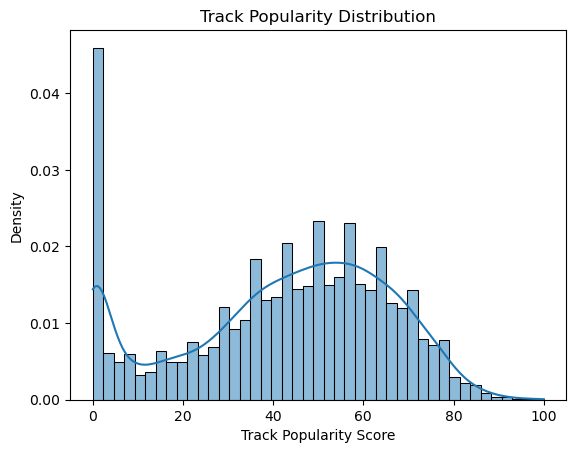

In [7]:
plt.figure()
sns.histplot(merged_df['track_popularity'], kde=True, stat='density')
plt.title('Track Popularity Distribution')
plt.xlabel('Track Popularity Score')
plt.show()

It's still very much zero-inflated.

Let's recalculate the token counts simply by using the split method.

In [8]:
# define a function to count tokens
def count_tokens(text):
    
    tokens = text.split()
    
    token_count = len(tokens)
    
    return token_count

# apply the function to the track_lyrics column
merged_df['token_count'] = merged_df['track_lyrics'].apply(count_tokens)

Let's visualize the distribution of token counts.

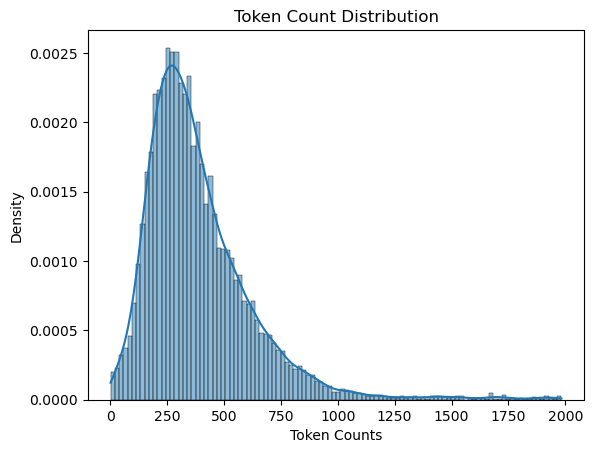

In [9]:
plt.figure()
sns.histplot(merged_df['token_count'], kde=True, stat='density')
plt.title('Token Count Distribution')
plt.xlabel('Token Counts')
plt.show()

In [10]:
# what is the minimum, maximum etc?

merged_df['token_count'].describe()

count    20072.000000
mean       390.170935
std        239.668554
min          2.000000
25%        234.000000
50%        339.000000
75%        489.000000
max       1983.000000
Name: token_count, dtype: float64

Let's see how many exceed 800 tokens.

In [11]:
high_token_df = merged_df[merged_df['token_count']>800]
high_token_df.shape[0]

1054

There are 1000 of them. Okay, not too bad. Let's also see how many have less than 10 tokens.

In [12]:
low_token_df = merged_df[merged_df['token_count']<10]
low_token_df.shape[0]

21

There are 21 of them.

Let's print the first 5 lyrics.

In [13]:
# let's check the first 5 lyrics 
for lyrics in merged_df['track_lyrics'][:5]:
    print(lyrics)
    print("\n-----------------------------\n")

Here's to the ones that we got
Cheers to the wish you were here, but you're not
'Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
'Cause the drinks bring back all the memories
And the memories bring back, memories bring back you

There's a time that I remember, when I did not know no pain
When I believed in forever, and everything would stay the same
Now my heart feel like December when somebody say your name
'Cause I can't reach out to call you, but I know I will one day, yeah

Everybody hurts sometimes
Everybody hurts someday, ayy-ayy
But everything gon' be alright
Go and raise a glass and say, ayy

Here's to the ones that we got
Cheers to the wish you were here, but you're not
'Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
'Cause the drinks bring back all the memories
And the memorie

There is again 'See Maroon 5 LiveGet tickets as low as $' in the first lyric. Unbelievable. Let's clean it. 

In [14]:
# define a function to remove these ads using a regex
def remove_ad(text):
    clean_text = text.replace("See Maroon 5 LiveGet tickets as low as $", "")
    return clean_text

# apply this function to both lyrics columns
merged_df['track_lyrics'] = merged_df['track_lyrics'].apply(remove_ad)

In [15]:
# let's check the first 5 lyrics again
for lyrics in merged_df['track_lyrics'][:5]:
    print(lyrics)
    print("\n-----------------------------\n")

Here's to the ones that we got
Cheers to the wish you were here, but you're not
'Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
'Cause the drinks bring back all the memories
And the memories bring back, memories bring back you

There's a time that I remember, when I did not know no pain
When I believed in forever, and everything would stay the same
Now my heart feel like December when somebody say your name
'Cause I can't reach out to call you, but I know I will one day, yeah

Everybody hurts sometimes
Everybody hurts someday, ayy-ayy
But everything gon' be alright
Go and raise a glass and say, ayy

Here's to the ones that we got
Cheers to the wish you were here, but you're not
'Cause the drinks bring back all the memories
Of everything we've been through
Toast to the ones here today
Toast to the ones that we lost on the way
'Cause the drinks bring back all the memories
And the memorie

Let's see the subgenre distribution of zero popularity songs.

In [16]:
zero_pop = merged_df[merged_df['track_popularity']==0] # create a zer popularity dataframe

In [18]:
cols = ['playlist_subgenre_album rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_subgenre_latin hip hop', 'playlist_subgenre_latin pop',
       'playlist_subgenre_neo soul', 'playlist_subgenre_new jack swing',
       'playlist_subgenre_permanent wave', 'playlist_subgenre_pop edm',
       'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house',
       'playlist_subgenre_southern hip hop', 'playlist_subgenre_trap',
       'playlist_subgenre_tropical', 'playlist_subgenre_urban contemporary']

for col in cols:
    print(col, zero_pop[col].sum())

playlist_subgenre_album rock 68
playlist_subgenre_big room 34
playlist_subgenre_classic rock 66
playlist_subgenre_dance pop 4
playlist_subgenre_electro house 41
playlist_subgenre_electropop 111
playlist_subgenre_gangster rap 180
playlist_subgenre_hard rock 89
playlist_subgenre_hip hop 4
playlist_subgenre_hip pop 33
playlist_subgenre_indie poptimism 91
playlist_subgenre_latin hip hop 118
playlist_subgenre_latin pop 55
playlist_subgenre_neo soul 132
playlist_subgenre_new jack swing 89
playlist_subgenre_permanent wave 10
playlist_subgenre_pop edm 69
playlist_subgenre_post-teen pop 49
playlist_subgenre_progressive electro house 138
playlist_subgenre_southern hip hop 104
playlist_subgenre_trap 27
playlist_subgenre_tropical 6
playlist_subgenre_urban contemporary 46


Turns out the highest frequency of zero popularity scored songs are in gangster rap, progressive electro house, and latin hip hop.

Let's also try tiktoken to count token number to be processed as inpout when using Open AI API.

In [19]:
%pip install --upgrade tiktoken
%pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/b4/a7/cc01e90cf64c96f8a1e5b8df71736160efe27028b32f045b939508ee0888/openai-1.16.2-py3-none-any.whl.metadata
  Using cached openai-1.16.2-py3-none-any.whl.metadata (21 kB)
Using cached openai-1.16.2-py3-none-any.whl (267 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.14.3
    Uninstalling openai-1.14.3:
      Successfully uninstalled openai-1.14.3
Note: you may need to restart the kernel to use updated packages.


In [20]:
# this code is provided on the Open AI website.
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

num_tokens_from_string("tiktoken is great!", "cl100k_base")

6

In [21]:
# create a column using the function defined above
merged_df['tiktoken_count'] = merged_df['track_lyrics'].apply(num_tokens_from_string, 
                                                              encoding_name="cl100k_base")

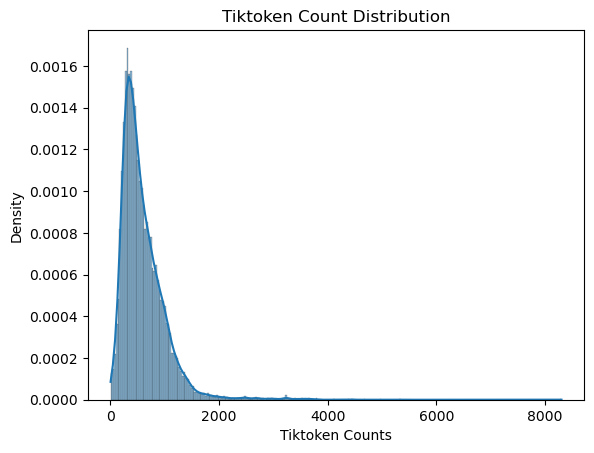

In [22]:
# visualize the distribution
plt.figure()
sns.histplot(merged_df['tiktoken_count'], kde=True, stat='density')
plt.title('Tiktoken Count Distribution')
plt.xlabel('Tiktoken Counts')
plt.show()

In [23]:
# how many total tokens will be processed while using OpenAI?
merged_df['tiktoken_count'].sum()

12088082

Let's also print some random lyrics and take a closer look.

In [27]:
import random

def print_random_counts_and_lyrics(df, num_samples=5):
    # select random rows 
    random_indices = random.sample(range(len(df)), min(num_samples, len(df)))
    for idx in random_indices:
        lyric = df.loc[idx, 'track_lyrics']
        tiktoken_count = df.loc[idx, 'tiktoken_count']
        token_count = df.loc[idx, 'token_count']
        print(f"Lyric: {lyric}")
        print(f"Index: {idx}")
        print(f"TikToken count: {tiktoken_count}")
        print(f"token count: {token_count}\n")


print_random_counts_and_lyrics(merged_df, num_samples=3)

Lyric: Bonjour

Hi
I didn't get your name
Love
I feel so out of place
'Cause

I don't usually come to parties
I'm a little bit shy but naughty
But since you laid eyes on me
(I want to)
Get up and move my body
I'm a little bit shy but naughty
But since you laid eyes on me
(I want to play)

La-la-la-la-la-la
A-la-la-la-la-la-la
I want to play
(I want to play)
(I want to play)
La-la-la-la-la-la-la
A-la-la-la-la-la-la
It's la-la-la-la-la-la
It's la-la-la-la-la-la
La-la-la-la-la-la-la
A-la-la-la-la-la-la
It's la-la-la-la-la-la
(I want to play)
La-la-la-la-la-la-la
A-la-la-la-la-la-la
It's la-la-la-la-la-la
It's la-la-la-la-la-la
La-la-la-la-la-la-la
A-la-la-la-la-la-la
It's la-la-la-la-la-la
It's la-la-la-la-la-la

Saw you here the other day
Wondered in my head if you'd wanna play
You said, you said no way
In the dark, we're back again
Wanna say the things that I never said
Replaying in my head
I don't usually come to parties
I'm a little bit shy but naughty
But since you laid eyes on me
(I

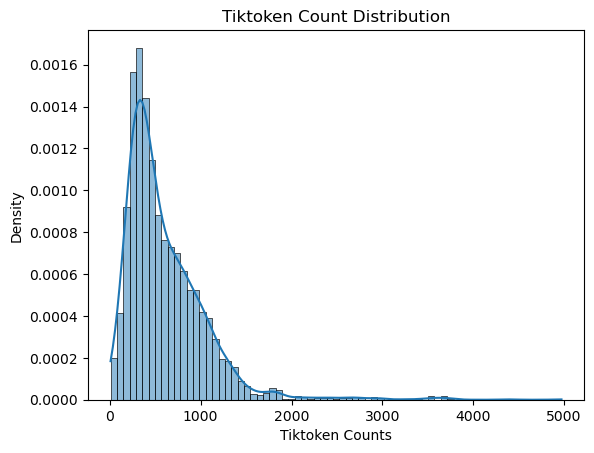

In [31]:
# what are the tiktoken counts for songs with track popularity below 10
subset_df = merged_df[merged_df['track_popularity']<10]

plt.figure()
sns.histplot(subset_df['tiktoken_count'], kde=True, stat='density')
plt.title('Tiktoken Count Distribution')
plt.xlabel('Tiktoken Counts')
plt.show()

In [37]:
lyrics_for_ai = merged_df[['track_id','track_lyrics']]
lyrics_for_ai.head()

,track_id,track_lyrics
0,0r7CVbZTWZgbTCYdfa2P31,Here's to the ones that we got\nCheers to the ...
1,1z1Hg7Vb0AhHDiEmnDE79l,Summertime and I'm caught in the feeling\nGett...
2,75FpbthrwQmzHlBJLuGdC7,Two kids with their hearts on fire\nWho's gonn...
3,1e8PAfcKUYoKkxPhrHqw4x,I'm going under and this time I fear there’s n...
4,7fvUMiyapMsRRxr07cU8Ef,L.A. on a Saturday night in the summer\nSundow...


In [41]:
lyrics_for_ai.set_index('track_id', inplace=True)

In [43]:
lyrics_for_ai.head()

,track_lyrics
track_id,
0r7CVbZTWZgbTCYdfa2P31,Here's to the ones that we got\nCheers to the ...
1z1Hg7Vb0AhHDiEmnDE79l,Summertime and I'm caught in the feeling\nGett...
75FpbthrwQmzHlBJLuGdC7,Two kids with their hearts on fire\nWho's gonn...
1e8PAfcKUYoKkxPhrHqw4x,I'm going under and this time I fear there’s n...
7fvUMiyapMsRRxr07cU8Ef,L.A. on a Saturday night in the summer\nSundow...


In [44]:
lyrics_for_ai['gpt_ratings'] = np.nan
lyrics_for_ai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20072 entries, 0r7CVbZTWZgbTCYdfa2P31 to 4xL5ytWp07oOvYRtcN4ehe
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_lyrics  20072 non-null  object 
 1   gpt_ratings   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 470.4+ KB


/var/folders/s5/45hh6t8d4x9_vh_g6phxsjbh0000gn/T/ipykernel_65323/1537441979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_for_ai['gpt_ratings'] = np.nan


In [45]:
lyrics_for_ai.to_csv('../datasets/lyrics_for_ai.csv')

In [46]:
lyrics_for_ai.shape

(20072, 2)

Now let's get 10 random ones for trial. I'll change the random_state until I get couple of songs with different alphabets.

In [63]:
lyrics_for_ai_subset = lyrics_for_ai.sample(n=10, random_state=73)

print(lyrics_for_ai_subset)

                                                             track_lyrics  \
track_id                                                                    
6Q1LtmZPFRGNZbH6VdarBQ  Я испытала огонь и воду\nКрик — моя вторая при...   
551lELbjN8sK1Va8qB71gM  Tenemo' una cuenta pendiente (Contigo)\nNo pod...   
3PqG25cnEC8xQdsO0SkzQF  I know it's hard to tell how mixed up you feel...   
5jNuiCt5KUR808pHv7JRnN  내 눈빛이 말해주고 있어\nLiar, liar, liar, 더 날 속이지마, oh\...   
4jBpZsZ9qx3cZhoEfuKElF  Si ayer no' comiamo' sin las luces\n¿Cómo pued...   
1sH8XzELvdFPkgJc7wz5Qd  Ooh ooh ooh\n\nLa primera vez que te vi, yea, ...   
6qsArsTq6WoqtUFUe1e15W  The desk where you sit inside of a frame\nMade...   
4Eg0cp8BDbHZOfmxXYJ7Ff  We're going to go on a dive to the deep sea, a...   
6kURXiIFcBrvfh11Soiwqv  I fly in space\nFlying from star to star\nFeel...   
3WbscWz4aaobZf7rt3ap2L  Law hangs by a thread\nHate grows when it’s fe...   

                        gpt_ratings  
track_id                             

In [65]:
lyrics_for_ai_subset.head() #track_id appears twice above, so let's check the first five rows.

,track_lyrics,gpt_ratings
track_id,,
6Q1LtmZPFRGNZbH6VdarBQ,Я испытала огонь и воду\nКрик — моя вторая при...,NaN
551lELbjN8sK1Va8qB71gM,Tenemo' una cuenta pendiente (Contigo)\nNo pod...,NaN
3PqG25cnEC8xQdsO0SkzQF,I know it's hard to tell how mixed up you feel...,NaN
5jNuiCt5KUR808pHv7JRnN,"내 눈빛이 말해주고 있어\nLiar, liar, liar, 더 날 속이지마, oh\...",NaN
4jBpZsZ9qx3cZhoEfuKElF,Si ayer no' comiamo' sin las luces\n¿Cómo pued...,NaN


It seems fine. Let's save this dataframe as well.

In [67]:
lyrics_for_ai_subset.to_csv('../datasets/lyrics_for_ai_subset.csv')

In the next notebook, I use Open AI API to analyze song lyrics with gpt 3.5.